When  processing images, it is useful to avoid artifacts, in particular when you try to understand biological processes. In the past, I have used natural images (found on internet, grabbed from holiday pictures, ...) without controlling for possible problems.

In particular, digital pictures are taken on pixels which are most often placed on a rectangular grid. It means that if you rotate that image, you may lose information and distort it and thus get wrong results (even for the right algorithm!). Moreover, pictures have a border while natural scenes do not, unless you are looking at it through an aperture. Intuitively, this means that large objects would not fit on the screen and are less informative.

In computer vision, it is easier to handle these problems in Fourier space. There, an image (that we suppose square for simplicity) is transformed in a matrix of coefficients of the same size as the image. If you rotate the image, the Fourier spectrum is also rotated. But as you rotate the image, the information that was in the corners of the original spectrum may span outside the spectrum of the rotated image. Also, the information in the center of the spectrum (around low frequencies) is less relevant than the rest.

Here, we will try to keep as much information about the image as possible, while removing the artifacts related to the process of digitalizing the picture.

<!-- TEASER_END -->

Let's first initialize an image and a [simple image processing library](https://github.com/bicv/SLIP):

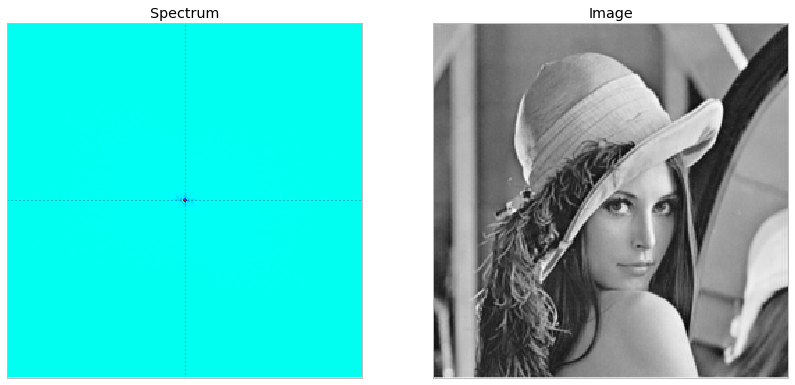

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from SLIP import Image
im = Image('https://raw.githubusercontent.com/bicv/SLIP/master/default_param.py')
image= im.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/lena256.png')
im.set_size(image)
_  = im.show_spectrum(image)

Much of the energy is contrated on the lower energies and we may scale them for a better visualization by using a whitening filter:

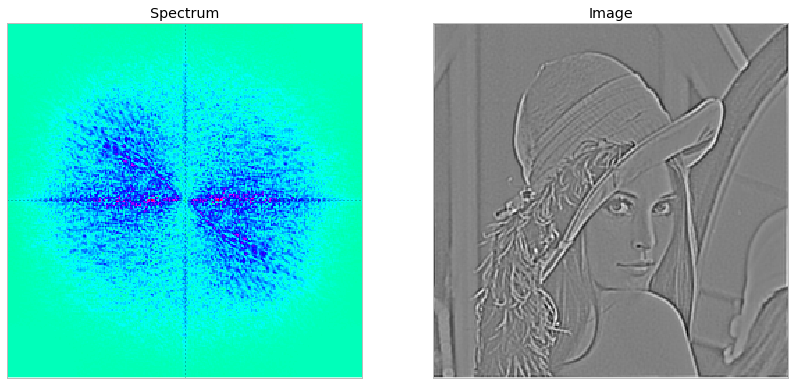

In [2]:
white = im.whitening(image)
_  = im.show_spectrum(white)

Note that much of the energy is concentrated on the cardinal axis. 


        A parametric description of the envelope of retinal processsing.
        See http://blog.invibe.net/posts/2015-05-21-a-simple-pre-processing-filter-for-image-processing.html
        for more information.

        In digital images, some of the energy in Fourier space is concentrated outside the 
        disk corresponding to the Nyquist frequency. Let's design a filter with:

            - a sharp cut-off for radial frequencies higher than the Nyquist frequency,
            - times a smooth but sharp transition (implemented with a decaying exponential),
            - times a high-pass filter designed by one minus a gaussian blur.

        This filter is rotation invariant.

        Note that this filter is defined by two parameters:
            - one for scaling the smoothness of the transition in the high-frequency range,
            - one for the characteristic length of the high-pass filter.

        The first is defined relative to the Nyquist frequency (in absolute values

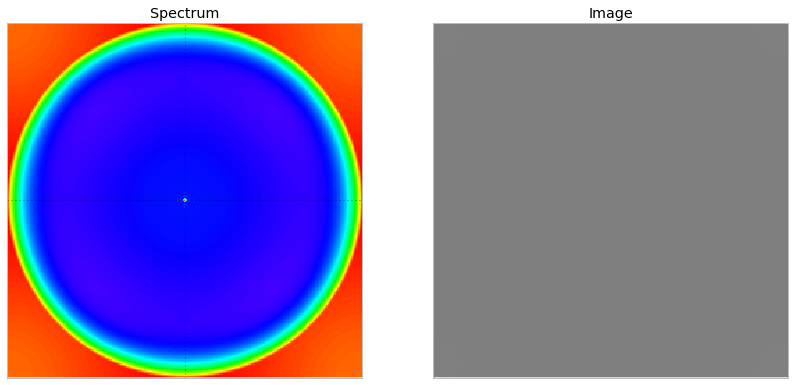

In [3]:
print(im.retina.__doc__)
_  = im.show_FT(im.f_mask)


        Returns the pre-processed image

        From raw pixelized images, we want to keep information that is relevent to the content of
        the objects in the image. In particular, we want to avoid:

            - information that would not be uniformly distributed when rotating the image. In
            particular, we discard information outside the unit disk in Fourier space, in particular 
            above the Nyquist frequency,
            - information that relates to information of the order the size of the image. This
            involves discarding information at low-level frequencies.

        See http://blog.invibe.net/posts/2015-05-21-a-simple-pre-processing-filter-for-image-processing.html
        for more information.
        


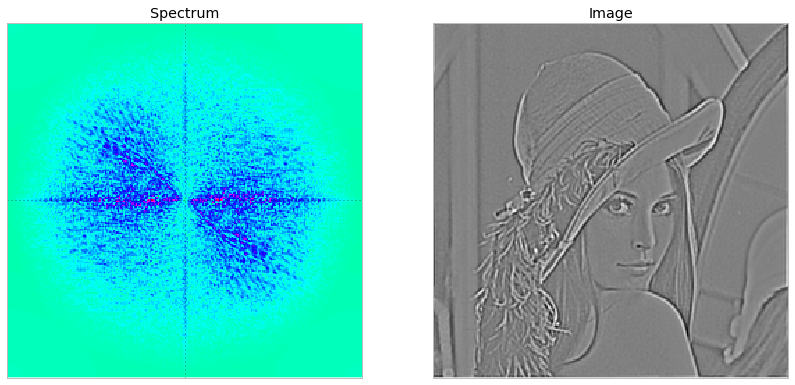

In [4]:
print(im.preprocess.__doc__)
white_pre = im.preprocess(white)
_  = im.show_spectrum(white_pre)

The residual is as expected mainly noise which corresponds to the information that we wished initaially to discard:

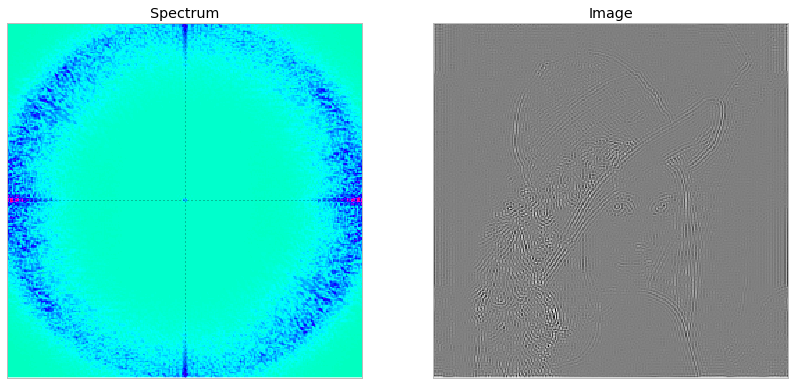

In [5]:
_  = im.show_spectrum(white_pre-white)

Applied to the original image directly, it shows a pretty recognizable pre-processed image:

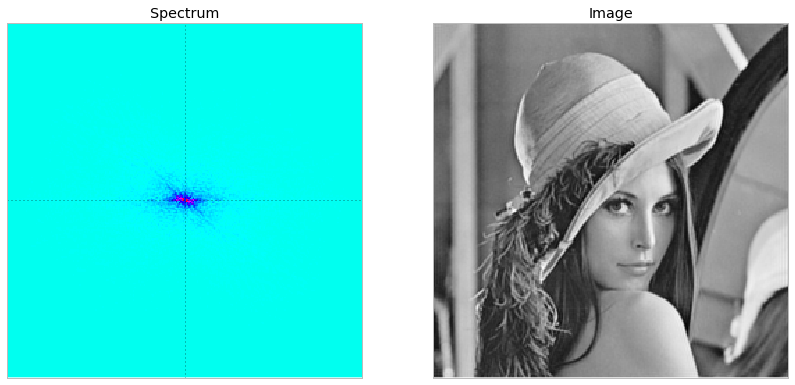

In [6]:
image_pre = im.preprocess(image)
_  = im.show_spectrum(image_pre)

Again, the residual shows the features that we wished to cancel out: 

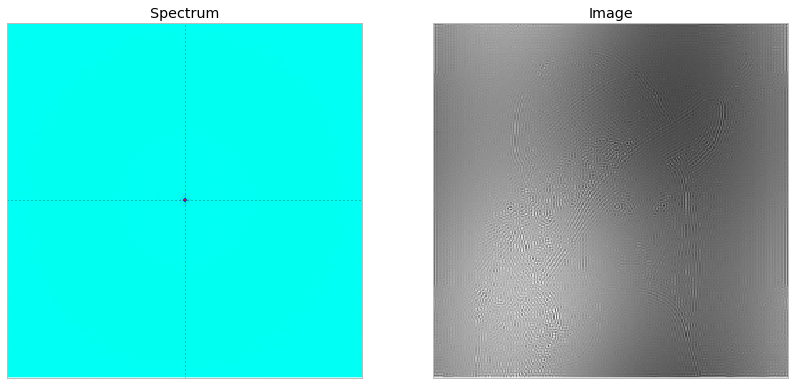

In [7]:
_  = im.show_spectrum(image_pre-image)

A whitening shows better the high-frequency artifact (by associativity of the Fourier transform, this result is *exactly* the same as the residual on the pre-processing of the whitened image shown above):

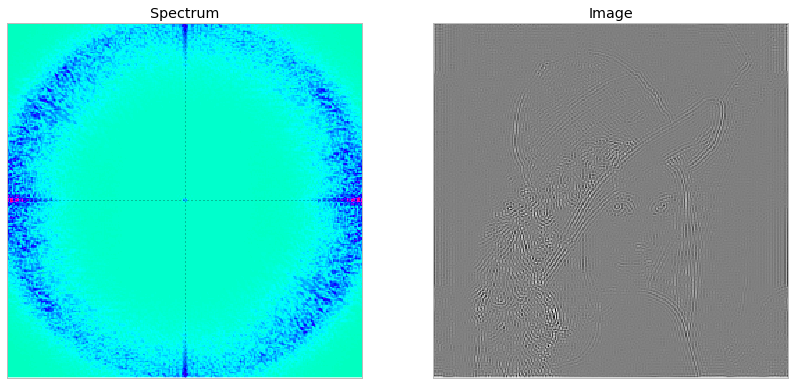

In [8]:
_  = im.show_spectrum(im.whitening(image_pre-image))

CQFD.